In [ ]:
'''
Please refer to the first tutorial for more details on the specifics of environments
We've only added important commands you might find useful for experiments.
'''
import gym
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

import gym
'''
List of example environments
(Source - https://gym.openai.com/envs/#classic_control)

'Acrobot-v1'
'Cartpole-v1'
'MountainCar-v0'
'''

env = gym.make('Acrobot-v1')
env.seed(0)

state_shape = env.observation_space.shape[0]
no_of_actions = env.action_space.n

print(state_shape)
print(no_of_actions)
print(env.action_space.sample())
print("----")

'''
# Understanding State, Action, Reward Dynamics

The agent decides an action to take depending on the state.

The Environment keeps a variable specifically for the current state.
- Everytime an action is passed to the environment, it calculates the new state and updates the current state variable.
- It returns the new current state and reward for the agent to take the next action

'''

state = env.reset()
''' This returns the initial state (when environment is reset) '''

print(state)
print("----")

action = env.action_space.sample()
''' We take a random action now '''

print(action)
print("----")

next_state, reward, done, info = env.step(action)
''' env.step is used to calculate new state and obtain reward based on old state and action taken  '''

print(next_state)
print(reward)
print(done)
print(info)
print("----")


6
3
2
----
[ 0.99962485  0.02738891  0.9989402  -0.04602639 -0.09180529 -0.09669447]
----
0
----
[ 0.9998245   0.01873245  0.995746   -0.09214022  0.00529764 -0.3585254 ]
-1.0
False
{}
----


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)


(64, 32) run - 1


<ipython-input-17-f48ba17dbec8>:38: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob = T.distributions.Categorical(F.softmax(self.policy.forward(state)))


(64, 32) run - 2
(64, 32) run - 3
(64, 32) run - 4
(64, 32) run - 5
64 32 [-500.  -500.  -500.  -500.  -500.  -500.  -500.  -500.  -483.4 -500.
 -500.  -500.  -500.  -479.  -500.  -500.  -468.6 -462.2 -500.  -500.
 -427.8 -500.  -500.  -500.  -500.  -500.  -495.4 -483.6 -434.8 -500.
 -466.2 -500.  -500.  -472.  -492.2 -500.  -500.  -500.  -500.  -447.4
 -500.  -500.  -500.  -500.  -500.  -500.  -457.6 -500.  -500.  -500.
 -484.4 -466.6 -500.  -500.  -490.2 -466.  -500.  -500.  -500.  -497.2
 -500.  -500.  -500.  -500.  -484.  -500.  -500.  -500.  -500.  -500.
 -459.  -500.  -476.8 -474.4 -500.  -500.  -491.6 -500.  -500.  -480.4
 -481.  -482.6 -500.  -500.  -500.  -470.8 -484.8 -500.  -453.  -469.4
 -456.4 -500.  -463.2 -471.  -500.  -493.2 -500.  -431.8 -484.2 -467.2
 -472.  -460.2 -486.  -470.  -500.  -499.  -500.  -468.8 -483.6 -468.8
 -481.6 -467.6 -441.6 -497.8 -459.8 -492.  -449.  -439.4 -468.6 -428.2
 -461.8 -484.  -458.8 -469.  -410.8 -489.8 -420.8 -477.  -444.8 -439.4
 -428.  

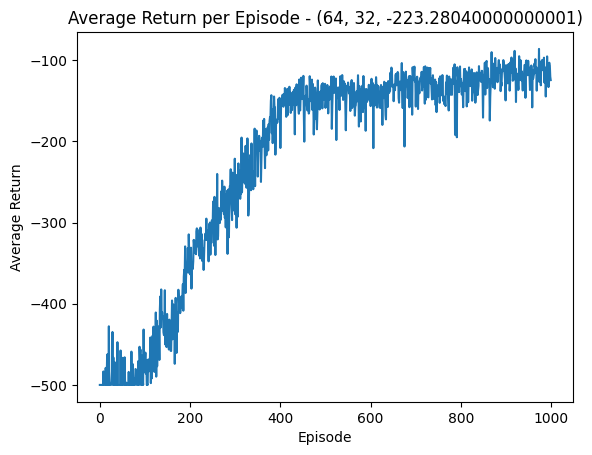

[[64, 32, -223.28040000000001]]


In [ ]:
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import gym
import matplotlib.pyplot as plt

T.manual_seed(42)


class net1(nn.Module):
    def __init__(self, alpha, input, l1, l2,n):
        super(net1, self).__init__()
        self.input = input[0]
        self.l1 = l1
        self.l2 = l2
        self.n = n
        self.fc1 = nn.Linear(self.input, self.l1)
        self.fc2 = nn.Linear(self.l1, self.l2)
        self.fc3 = nn.Linear(self.l2, self.n)
        self.optimizer = optim.Adam(self.parameters(), lr=alpha)
    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Agent1(object):
    def __init__(self, alpha, input,l1, l2, n, g=0.99):
        self.policy = net1(alpha, input, l1, l2,n)
        self.memory_a = []
        self.g = g
        self.memory_r = []

    def choose_action(self, state):
        state = T.tensor(state, dtype=T.float)  # Convert state to tensor
        prob = T.distributions.Categorical(F.softmax(self.policy.forward(state)))
        action = prob.sample()
        log_probs = prob.log_prob(action)
        self.memory_a.append(log_probs)
        return action.item()


    def rewards(self,reward):
        self.memory_r.append(reward)

    def learn(self):
        self.policy.optimizer.zero_grad()
        G=np.zeros_like(self.memory_r, dtype=np.float64)
        for t in range(len(self.memory_r)):
            sum_g=0
            discount=1
            for k in range(t, len(self.memory_r)):
                sum_g += self.memory_r[k] * discount
                discount *= self.g
            G[t]=sum_g
        mean=np.mean(G)
        std=np.std(G) if np.std(G) > 0 else 1
        G=(G - mean) / std
        G=T.tensor(G, dtype=T.float)
        loss=0
        for g_, logprob in zip(G, self.memory_a):
            loss += -g_* logprob
        loss.backward()
        self.policy.optimizer.step()
        self.memory_r=[]
        self.memory_a=[]



env_name = 'Acrobot-v1'
num_runs = 5
num_episodes = 1000

l1=64
l2=32
values=[]

average_score = []
for run in range(num_runs):
    print(f"{l1,l2} run - {run + 1}")
    env = gym.make(env_name)
    env.reset()
    agent = Agent1(alpha=0.001, input=[env.observation_space.shape[0]], g=0.99, n=env.action_space.n, l1=l1, l2=l2)
    score_history = []

    for i in range(num_episodes):
        done = False
        score = 0
        state = env.reset()
        l=0
        while not done:
            action = agent.choose_action(state)
            state1, reward, done, info = env.step(action)
            agent.rewards(reward)
            state = state1
            score += reward
            l+=1
        score_history.append(score)
        agent.learn()
    average_score.append(score_history)

average_scores = np.mean(average_score,axis=0)
print(l1,l2,average_scores)
plt.plot(average_scores)
plt.xlabel('Episode')
plt.ylabel('Average Return')
plt.title(f'Average Return per Episode - {l1,l2,np.mean(average_scores)}')
plt.show()
values.append([l1,l2,np.mean(average_scores)])
print(values)



In [ ]:
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import gym
import matplotlib.pyplot as plt

T.manual_seed(42)

class net1(nn.Module):
    def __init__(self, alpha, input, l1, l2,n):
        super(net1, self).__init__()
        self.input = input[0]
        self.l1 = l1
        self.l2 = l2
        self.n = n
        self.fc1 = nn.Linear(self.input, self.l1)
        self.fc2 = nn.Linear(self.l1, self.l2)
        self.fc3 = nn.Linear(self.l2, self.n)
        self.optimizer = optim.Adam(self.parameters(), lr=alpha)
    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Agent1(object):
    def __init__(self, alpha, input,l1, l2, n, g=0.99):
        self.policy = net1(alpha, input, l1, l2,n)
        self.memory_a = []
        self.g = g
        self.memory_r = []
        self.baseline = None

    def choose_action(self, state):
        state = T.tensor(state, dtype=T.float)
        prob = T.distributions.Categorical(F.softmax(self.policy.forward(state)))
        action = prob.sample()
        log_probs = prob.log_prob(action)
        self.memory_a.append(log_probs)
        return action.item()


    def rewards(self,reward):
        self.memory_r.append(reward)

    def learn(self):
        self.policy.optimizer.zero_grad()
        G = np.zeros_like(self.memory_r, dtype=np.float64)
        for t in range(len(self.memory_r)):
            G_sum = 0
            discount = 1
            for k in range(t, len(self.memory_r)):
                G_sum += self.memory_r[k] * discount
                discount *= self.g
            G[t] = G_sum

        self.baseline = np.mean(G)
        G = G - self.baseline
        G = T.tensor(G, dtype=T.float)

        loss = 0
        for g_, logprob in zip(G, self.memory_a):
            loss += -g_ * logprob

        loss.backward()
        self.policy.optimizer.step()

        self.memory_a = []
        self.memory_r = []



env_name = 'Acrobot-v1'
num_runs = 5
num_episodes = 1000

l1=32
l2=128
values=[]

average_score_b = []
for run in range(num_runs):
    print(f"{l1,l2} run - {run + 1}")
    env = gym.make(env_name)
    env.reset()
    agent = Agent1(alpha=0.001, input=[env.observation_space.shape[0]], g=0.99, n=env.action_space.n, l1=l1, l2=l2)
    score_history = []

    for i in range(num_episodes):
        done = False
        score = 0
        state = env.reset()
        l=0
        while not done:
            action = agent.choose_action(state)
            state1, reward, done, info = env.step(action)
            agent.rewards(reward)
            state = state1
            score += reward
            l+=1
        score_history.append(score)
        agent.learn()
    average_score_b.append(score_history)

average_scores_b = np.mean(average_score_b,axis=0)
print(l1,l2,average_scores_b)
plt.plot(average_scores_b)
plt.xlabel('Episode')
plt.ylabel('Average Return')
plt.title(f'Average Return per Episode - {l1,l2,np.mean(average_scores_b)}')
plt.show()
values.append([l1,l2,np.mean(average_scores_b)])
print(values)

32 128 [-500.  -500.  -500.  -500.  -500.  -500.  -500.  -500.  -500.  -500.
 -500.  -500.  -500.  -500.  -500.  -500.  -500.  -500.  -479.8 -492.
 -500.  -467.  -500.  -500.  -468.8 -500.  -500.  -500.  -500.  -472.6
 -484.8 -500.  -495.6 -500.  -493.  -500.  -500.  -500.  -493.6 -500.
 -500.  -477.  -464.6 -451.8 -459.4 -500.  -476.6 -465.8 -496.  -452.2
 -441.4 -445.8 -447.2 -461.4 -483.6 -490.6 -436.  -461.  -500.  -450.4
 -463.4 -437.8 -449.8 -436.  -433.4 -428.8 -500.  -387.6 -432.4 -439.8
 -404.6 -451.2 -433.2 -437.2 -451.4 -454.  -469.2 -394.  -429.6 -399.6
 -404.6 -388.2 -445.8 -391.2 -382.2 -377.6 -462.  -412.4 -347.2 -346.4
 -387.6 -410.2 -365.6 -403.  -311.6 -394.6 -383.6 -380.8 -321.  -351.4
 -361.8 -348.2 -330.8 -338.  -352.2 -350.8 -305.8 -328.4 -335.2 -292.6
 -346.6 -330.6 -290.8 -308.  -306.6 -364.8 -327.2 -306.  -281.2 -347.
 -343.4 -308.  -310.4 -324.4 -318.4 -293.6 -293.6 -312.8 -340.  -313.8
 -329.2 -315.  -271.8 -278.8 -315.8 -299.6 -328.4 -267.4 -296.6 -329.8
 -3

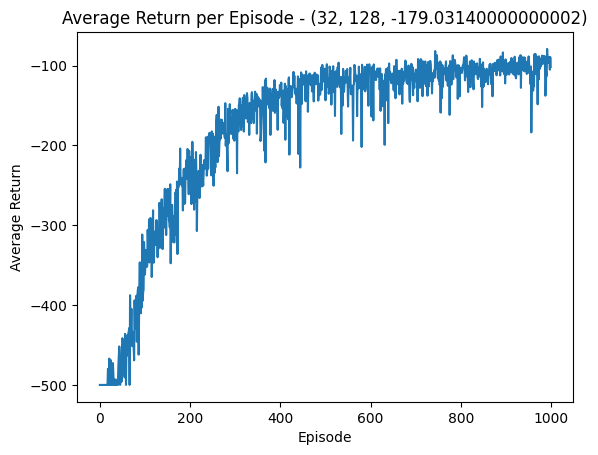

[[32, 128, -179.03140000000002]]


In [ ]:
average_scores_b = np.mean(average_score_b,axis=0)
print(l1,l2,average_scores_b)
plt.plot(average_scores_b)
plt.xlabel('Episode')
plt.ylabel('Average Return')
plt.title(f'Average Return per Episode - {l1,l2,np.mean(average_scores_b)}')
plt.show()
values.append([l1,l2,np.mean(average_scores_b)])
print(values)

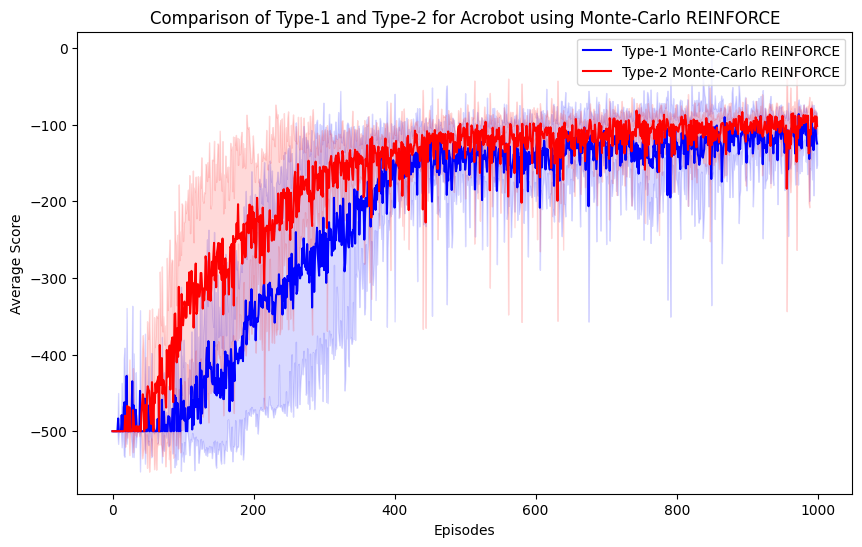

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_type1_and_type2(type1_score, type2_score, algo_name):

    type1_mean = np.mean(type1_score, axis=0)
    type1_std = np.std(type1_score, axis=0)
    type2_mean = np.mean(type2_score, axis=0)
    type2_std = np.std(type2_score, axis=0)
    plt.figure(figsize=(10, 6))
    plt.plot(type1_mean, label=f'Type-1 {algo_name}', color='blue')
    plt.fill_between(range(len(type1_mean)),
                    type1_mean - type1_std,
                    type1_mean + type1_std,
                    alpha=0.15, color='blue')
    plt.plot(type2_mean, label=f'Type-2 {algo_name}', color='red')
    plt.fill_between(range(len(type2_mean)),
                    type2_mean - type2_std,
                    type2_mean + type2_std,
                    alpha=0.15, color='red')

    plt.title(f'Comparison of Type-1 and Type-2 for Acrobot using {algo_name}')
    plt.xlabel('Episodes')
    plt.ylabel('Average Score')
    plt.legend()

    # Show plot
    plt.show()

plot_type1_and_type2(average_score, average_score_b, 'Monte-Carlo REINFORCE')



In [ ]:
print(average_score)

[[-500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -312.0, -500.0, -500.0, -500.0, -500.0, -500.0, -477.0, -500.0, -246.0, -500.0, -331.0, -500.0, -500.0, -485.0, -461.0, -500.0, -500.0, -500.0, -500.0, -237.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -288.0, -500.0, -500.0, -500.0, -500.0, -466.0, -500.0, -500.0, -451.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -420.0, -500.0, -500.0, -500.0, -500.0, -500.0, -295.0, -500.0, -500.0, -500.0, -500.0, -500.0, -458.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -450.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -374.0, -500.0, -500.0, -500.0, -466.0, -500.0, -336.0, -360.0, -500.0, -500.0, -350.0, -500.0, -500.0, -500.0, -429.0, -418.0, -500.0, -500.0, -443.0, -364.0, -500.0, -414.0, -460.0, -245.0, -340.0, -419.0, -288.0, -427.0, -496.0, -500.0, -500.0, -265.0

In [ ]:
average_score_b=[[-500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -403.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -326.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -354.0, -500.0, -500.0, -500.0, -473.0, -447.0, -500.0, -488.0, -487.0, -408.0, -500.0, -401.0, -471.0, -311.0, -500.0, -500.0, -500.0, -278.0, -500.0, -402.0, -292.0, -422.0, -500.0, -283.0, -326.0, -454.0, -441.0, -500.0, -350.0, -249.0, -447.0, -500.0, -440.0, -373.0, -288.0, -475.0, -234.0, -455.0, -387.0, -500.0, -351.0, -500.0, -422.0, -235.0, -328.0, -395.0, -467.0, -500.0, -370.0, -242.0, -381.0, -337.0, -322.0, -455.0, -318.0, -284.0, -351.0, -233.0, -236.0, -189.0, -319.0, -253.0, -281.0, -342.0, -276.0, -355.0, -315.0, -176.0, -500.0, -277.0, -364.0, -307.0, -388.0, -361.0, -340.0, -372.0, -389.0, -307.0, -289.0, -201.0, -202.0, -305.0, -176.0, -500.0, -201.0, -246.0, -215.0, -261.0, -230.0, -240.0, -201.0, -165.0, -204.0, -224.0, -160.0, -319.0, -205.0, -197.0, -296.0, -172.0, -203.0, -191.0, -195.0, -204.0, -272.0, -185.0, -162.0, -209.0, -200.0, -188.0, -167.0, -216.0, -177.0, -211.0, -230.0, -204.0, -143.0, -125.0, -239.0, -189.0, -349.0, -269.0, -167.0, -306.0, -141.0, -198.0, -227.0, -192.0, -156.0, -164.0, -191.0, -255.0, -209.0, -199.0, -204.0, -257.0, -130.0, -132.0, -204.0, -190.0, -255.0, -174.0, -169.0, -188.0, -148.0, -185.0, -184.0, -204.0, -171.0, -155.0, -185.0, -159.0, -160.0, -159.0, -131.0, -224.0, -165.0, -135.0, -212.0, -138.0, -108.0, -208.0, -183.0, -165.0, -184.0, -115.0, -197.0, -163.0, -126.0, -129.0, -191.0, -191.0, -157.0, -186.0, -147.0, -198.0, -246.0, -258.0, -182.0, -276.0, -159.0, -166.0, -152.0, -200.0, -197.0, -141.0, -217.0, -206.0, -201.0, -121.0, -244.0, -182.0, -150.0, -323.0, -185.0, -121.0, -303.0, -239.0, -138.0, -146.0, -156.0, -143.0, -203.0, -144.0, -214.0, -169.0, -194.0, -170.0, -135.0, -155.0, -173.0, -157.0, -120.0, -200.0, -168.0, -203.0, -185.0, -144.0, -181.0, -159.0, -177.0, -115.0, -191.0, -240.0, -197.0, -143.0, -188.0, -123.0, -165.0, -164.0, -219.0, -154.0, -154.0, -145.0, -209.0, -160.0, -153.0, -117.0, -145.0, -217.0, -137.0, -147.0, -171.0, -130.0, -159.0, -172.0, -162.0, -156.0, -155.0, -129.0, -199.0, -117.0, -196.0, -136.0, -164.0, -159.0, -109.0, -180.0, -161.0, -149.0, -125.0, -182.0, -151.0, -129.0, -160.0, -162.0, -146.0, -162.0, -174.0, -242.0, -150.0, -125.0, -108.0, -178.0, -129.0, -139.0, -121.0, -134.0, -191.0, -125.0, -149.0, -215.0, -116.0, -122.0, -123.0, -104.0, -158.0, -219.0, -122.0, -119.0, -154.0, -135.0, -108.0, -186.0, -120.0, -139.0, -147.0, -88.0, -102.0, -141.0, -101.0, -119.0, -138.0, -108.0, -135.0, -102.0, -108.0, -96.0, -179.0, -106.0, -126.0, -108.0, -114.0, -109.0, -130.0, -129.0, -115.0, -104.0, -126.0, -153.0, -166.0, -118.0, -141.0, -161.0, -103.0, -132.0, -131.0, -141.0, -202.0, -122.0, -105.0, -164.0, -101.0, -116.0, -166.0, -106.0, -117.0, -173.0, -132.0, -99.0, -123.0, -87.0, -100.0, -172.0, -147.0, -129.0, -130.0, -154.0, -137.0, -118.0, -117.0, -103.0, -180.0, -99.0, -113.0, -126.0, -143.0, -93.0, -142.0, -155.0, -111.0, -137.0, -112.0, -146.0, -122.0, -134.0, -110.0, -143.0, -107.0, -150.0, -124.0, -121.0, -102.0, -139.0, -103.0, -163.0, -126.0, -98.0, -129.0, -92.0, -137.0, -216.0, -161.0, -86.0, -146.0, -179.0, -125.0, -99.0, -116.0, -160.0, -88.0, -121.0, -105.0, -102.0, -85.0, -118.0, -128.0, -145.0, -129.0, -131.0, -131.0, -96.0, -99.0, -179.0, -71.0, -112.0, -129.0, -102.0, -105.0, -100.0, -140.0, -104.0, -102.0, -120.0, -87.0, -119.0, -107.0, -111.0, -122.0, -100.0, -93.0, -88.0, -102.0, -141.0, -361.0, -134.0, -106.0, -109.0, -92.0, -165.0, -108.0, -98.0, -206.0, -120.0, -120.0, -106.0, -122.0, -140.0, -69.0, -118.0, -101.0, -102.0, -129.0, -141.0, -102.0, -121.0, -125.0, -108.0, -133.0, -261.0, -99.0, -133.0, -145.0, -104.0, -109.0, -133.0, -101.0, -126.0, -131.0, -91.0, -186.0, -122.0, -167.0, -130.0, -103.0, -101.0, -142.0, -122.0, -121.0, -127.0, -99.0, -131.0, -96.0, -125.0, -129.0, -73.0, -105.0, -108.0, -163.0, -101.0, -134.0, -244.0, -114.0, -151.0, -97.0, -90.0, -152.0, -127.0, -105.0, -134.0, -110.0, -114.0, -124.0, -97.0, -137.0, -153.0, -135.0, -188.0, -109.0, -147.0, -107.0, -118.0, -99.0, -82.0, -119.0, -155.0, -250.0, -134.0, -91.0, -107.0, -91.0, -124.0, -110.0, -105.0, -119.0, -122.0, -145.0, -347.0, -94.0, -137.0, -135.0, -130.0, -105.0, -104.0, -100.0, -96.0, -109.0, -94.0, -113.0, -98.0, -103.0, -140.0, -118.0, -107.0, -94.0, -85.0, -104.0, -91.0, -131.0, -103.0, -100.0, -116.0, -500.0, -139.0, -92.0, -101.0, -113.0, -109.0, -117.0, -101.0, -106.0, -109.0, -107.0, -119.0, -113.0, -114.0, -117.0, -97.0, -96.0, -180.0, -105.0, -137.0, -119.0, -128.0, -198.0, -149.0, -244.0, -111.0, -104.0, -129.0, -95.0, -119.0, -131.0, -105.0, -196.0, -140.0, -113.0, -146.0, -113.0, -100.0, -105.0, -177.0, -104.0, -139.0, -120.0, -126.0, -96.0, -103.0, -92.0, -102.0, -120.0, -107.0, -126.0, -116.0, -108.0, -102.0, -128.0, -137.0, -96.0, -110.0, -110.0, -96.0, -87.0, -150.0, -103.0, -109.0, -112.0, -146.0, -131.0, -125.0, -146.0, -87.0, -126.0, -192.0, -116.0, -298.0, -91.0, -94.0, -121.0, -103.0, -100.0, -81.0, -93.0, -106.0, -137.0, -88.0, -94.0, -111.0, -113.0, -102.0, -96.0, -91.0, -113.0, -101.0, -95.0, -121.0, -101.0, -119.0, -120.0, -101.0, -86.0, -129.0, -142.0, -101.0, -96.0, -133.0, -112.0, -89.0, -168.0, -121.0, -81.0, -113.0, -95.0, -110.0, -87.0, -107.0, -109.0, -85.0, -96.0, -102.0, -97.0, -89.0, -97.0, -92.0, -152.0, -99.0, -284.0, -88.0, -95.0, -203.0, -89.0, -187.0, -83.0, -91.0, -117.0, -82.0, -63.0, -95.0, -87.0, -101.0, -131.0, -91.0, -103.0, -106.0, -100.0, -92.0, -123.0, -105.0, -110.0, -93.0, -92.0, -101.0, -102.0, -87.0, -125.0, -77.0, -120.0, -98.0, -96.0, -103.0, -106.0, -101.0, -105.0, -98.0, -110.0, -88.0, -80.0, -104.0, -90.0, -85.0, -160.0, -94.0, -100.0, -117.0, -104.0, -117.0, -94.0, -95.0, -82.0, -82.0, -87.0, -93.0, -88.0, -82.0, -119.0, -97.0, -111.0, -277.0, -108.0, -98.0, -102.0, -86.0, -197.0, -97.0, -152.0, -110.0, -98.0, -100.0, -111.0, -184.0, -98.0, -104.0, -174.0, -94.0, -109.0, -134.0, -118.0, -90.0, -156.0, -119.0, -119.0, -90.0, -86.0, -82.0, -108.0, -82.0, -95.0, -100.0, -108.0, -151.0, -80.0, -110.0, -71.0, -97.0, -97.0, -113.0, -115.0, -108.0, -119.0, -98.0, -101.0, -103.0, -120.0, -72.0, -104.0, -95.0, -111.0, -124.0, -105.0, -71.0, -86.0, -111.0, -90.0, -99.0, -99.0, -74.0, -103.0, -90.0, -133.0, -112.0, -100.0, -107.0, -85.0, -106.0, -81.0, -90.0, -115.0, -101.0, -98.0, -68.0, -99.0, -81.0, -101.0, -111.0, -75.0, -98.0, -112.0, -90.0, -87.0, -103.0, -84.0, -130.0, -142.0, -99.0, -135.0, -83.0, -92.0, -94.0, -170.0, -105.0, -101.0, -95.0, -106.0, -75.0, -114.0, -110.0, -103.0, -95.0, -102.0, -164.0, -88.0, -94.0, -83.0, -129.0, -115.0, -94.0, -113.0, -98.0, -112.0, -130.0, -88.0, -143.0, -91.0, -89.0, -82.0, -86.0, -87.0, -100.0, -107.0, -88.0, -119.0, -76.0, -101.0, -108.0, -81.0, -113.0, -81.0, -116.0, -75.0, -90.0, -87.0, -88.0, -102.0, -87.0, -99.0, -92.0, -90.0, -121.0, -248.0, -81.0, -121.0, -91.0, -87.0, -109.0, -81.0, -101.0, -90.0, -115.0, -192.0, -88.0, -123.0, -114.0, -106.0, -165.0, -93.0, -91.0, -89.0, -109.0, -93.0, -88.0, -98.0, -86.0, -95.0, -107.0, -79.0, -133.0, -108.0, -113.0, -115.0, -261.0, -93.0, -93.0, -84.0, -87.0, -103.0, -108.0, -94.0, -86.0, -84.0, -91.0, -105.0], [-500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -460.0, -500.0, -500.0, -500.0, -500.0, -344.0, -500.0, -500.0, -500.0, -500.0, -500.0, -424.0, -500.0, -478.0, -500.0, -500.0, -500.0, -500.0, -500.0, -468.0, -500.0, -500.0, -464.0, -500.0, -301.0, -459.0, -500.0, -383.0, -341.0, -500.0, -500.0, -343.0, -366.0, -236.0, -490.0, -418.0, -453.0, -428.0, -432.0, -500.0, -500.0, -500.0, -440.0, -500.0, -285.0, -339.0, -350.0, -500.0, -359.0, -361.0, -500.0, -302.0, -465.0, -310.0, -336.0, -416.0, -500.0, -489.0, -454.0, -262.0, -404.0, -401.0, -251.0, -500.0, -254.0, -223.0, -313.0, -493.0, -345.0, -160.0, -340.0, -183.0, -340.0, -260.0, -500.0, -187.0, -358.0, -281.0, -317.0, -241.0, -227.0, -251.0, -280.0, -337.0, -208.0, -236.0, -187.0, -293.0, -240.0, -180.0, -196.0, -196.0, -256.0, -177.0, -213.0, -191.0, -382.0, -200.0, -204.0, -220.0, -220.0, -172.0, -195.0, -215.0, -262.0, -315.0, -217.0, -160.0, -157.0, -174.0, -219.0, -219.0, -275.0, -238.0, -145.0, -181.0, -173.0, -125.0, -191.0, -387.0, -222.0, -260.0, -163.0, -186.0, -189.0, -184.0, -234.0, -205.0, -221.0, -210.0, -217.0, -197.0, -197.0, -195.0, -327.0, -186.0, -328.0, -217.0, -297.0, -221.0, -235.0, -175.0, -231.0, -209.0, -218.0, -246.0, -312.0, -276.0, -236.0, -283.0, -205.0, -237.0, -166.0, -301.0, -242.0, -172.0, -209.0, -224.0, -163.0, -157.0, -195.0, -221.0, -298.0, -174.0, -171.0, -246.0, -162.0, -275.0, -165.0, -232.0, -295.0, -176.0, -135.0, -131.0, -128.0, -177.0, -192.0, -196.0, -222.0, -184.0, -146.0, -190.0, -267.0, -240.0, -246.0, -250.0, -226.0, -238.0, -207.0, -233.0, -208.0, -163.0, -222.0, -161.0, -219.0, -147.0, -209.0, -263.0, -228.0, -164.0, -153.0, -243.0, -216.0, -112.0, -182.0, -126.0, -154.0, -225.0, -130.0, -208.0, -169.0, -219.0, -134.0, -123.0, -212.0, -156.0, -140.0, -205.0, -163.0, -151.0, -177.0, -130.0, -183.0, -174.0, -151.0, -137.0, -172.0, -179.0, -154.0, -166.0, -150.0, -138.0, -179.0, -181.0, -128.0, -245.0, -123.0, -215.0, -163.0, -178.0, -157.0, -144.0, -283.0, -168.0, -104.0, -199.0, -147.0, -137.0, -135.0, -144.0, -134.0, -155.0, -133.0, -153.0, -199.0, -177.0, -96.0, -186.0, -182.0, -135.0, -123.0, -133.0, -164.0, -119.0, -500.0, -95.0, -146.0, -133.0, -195.0, -156.0, -163.0, -216.0, -179.0, -166.0, -148.0, -153.0, -121.0, -135.0, -150.0, -131.0, -153.0, -138.0, -134.0, -127.0, -139.0, -154.0, -109.0, -136.0, -179.0, -172.0, -115.0, -167.0, -122.0, -121.0, -274.0, -169.0, -201.0, -166.0, -152.0, -183.0, -211.0, -112.0, -119.0, -179.0, -146.0, -157.0, -128.0, -95.0, -129.0, -218.0, -177.0, -126.0, -226.0, -167.0, -126.0, -139.0, -139.0, -164.0, -122.0, -195.0, -146.0, -141.0, -116.0, -157.0, -191.0, -109.0, -136.0, -187.0, -122.0, -218.0, -142.0, -174.0, -134.0, -168.0, -151.0, -149.0, -173.0, -194.0, -172.0, -148.0, -161.0, -258.0, -147.0, -131.0, -160.0, -226.0, -127.0, -115.0, -255.0, -112.0, -185.0, -195.0, -133.0, -135.0, -188.0, -188.0, -192.0, -179.0, -147.0, -230.0, -156.0, -166.0, -172.0, -139.0, -135.0, -181.0, -145.0, -121.0, -151.0, -186.0, -183.0, -115.0, -155.0, -185.0, -212.0, -395.0, -203.0, -148.0, -115.0, -134.0, -128.0, -140.0, -146.0, -163.0, -169.0, -137.0, -228.0, -169.0, -241.0, -184.0, -184.0, -198.0, -254.0, -97.0, -317.0, -123.0, -167.0, -160.0, -195.0, -128.0, -147.0, -289.0, -138.0, -201.0, -113.0, -200.0, -156.0, -169.0, -115.0, -134.0, -107.0, -153.0, -137.0, -114.0, -147.0, -170.0, -128.0, -154.0, -143.0, -130.0, -152.0, -112.0, -135.0, -150.0, -152.0, -500.0, -124.0, -124.0, -121.0, -132.0, -109.0, -117.0, -119.0, -127.0, -100.0, -99.0, -160.0, -119.0, -114.0, -130.0, -100.0, -110.0, -96.0, -108.0, -113.0, -116.0, -115.0, -200.0, -140.0, -124.0, -99.0, -117.0, -166.0, -139.0, -157.0, -125.0, -157.0, -94.0, -118.0, -109.0, -178.0, -159.0, -117.0, -144.0, -118.0, -226.0, -172.0, -137.0, -119.0, -138.0, -163.0, -139.0, -123.0, -129.0, -110.0, -96.0, -89.0, -141.0, -110.0, -102.0, -114.0, -195.0, -110.0, -123.0, -121.0, -205.0, -155.0, -118.0, -196.0, -172.0, -121.0, -115.0, -138.0, -98.0, -110.0, -113.0, -115.0, -125.0, -113.0, -91.0, -107.0, -133.0, -107.0, -109.0, -110.0, -104.0, -112.0, -131.0, -99.0, -100.0, -105.0, -136.0, -101.0, -144.0, -136.0, -96.0, -429.0, -130.0, -108.0, -135.0, -136.0, -105.0, -121.0, -122.0, -162.0, -101.0, -105.0, -85.0, -90.0, -129.0, -90.0, -128.0, -142.0, -146.0, -124.0, -131.0, -105.0, -236.0, -143.0, -153.0, -116.0, -143.0, -500.0, -149.0, -111.0, -115.0, -100.0, -113.0, -146.0, -129.0, -104.0, -253.0, -132.0, -128.0, -107.0, -111.0, -136.0, -130.0, -97.0, -99.0, -145.0, -111.0, -90.0, -152.0, -151.0, -113.0, -162.0, -100.0, -114.0, -114.0, -114.0, -117.0, -102.0, -125.0, -157.0, -132.0, -97.0, -123.0, -132.0, -80.0, -97.0, -95.0, -103.0, -112.0, -109.0, -93.0, -129.0, -104.0, -114.0, -111.0, -113.0, -113.0, -122.0, -110.0, -107.0, -89.0, -125.0, -112.0, -101.0, -100.0, -111.0, -113.0, -106.0, -108.0, -137.0, -112.0, -129.0, -220.0, -123.0, -195.0, -107.0, -142.0, -91.0, -112.0, -143.0, -100.0, -105.0, -104.0, -136.0, -111.0, -119.0, -118.0, -107.0, -123.0, -96.0, -123.0, -119.0, -188.0, -164.0, -84.0, -94.0, -110.0, -102.0, -111.0, -105.0, -105.0, -114.0, -114.0, -96.0, -100.0, -123.0, -145.0, -114.0, -126.0, -102.0, -101.0, -109.0, -109.0, -107.0, -147.0, -93.0, -199.0, -141.0, -120.0, -116.0, -111.0, -88.0, -91.0, -103.0, -87.0, -103.0, -112.0, -118.0, -89.0, -111.0, -91.0, -115.0, -131.0, -76.0, -133.0, -137.0, -88.0, -100.0, -117.0, -124.0, -210.0, -113.0, -170.0, -178.0, -120.0, -127.0, -89.0, -90.0, -102.0, -105.0, -130.0, -104.0, -112.0, -118.0, -107.0, -111.0, -108.0, -85.0, -94.0, -93.0, -110.0, -112.0, -89.0, -128.0, -114.0, -89.0, -186.0, -98.0, -99.0, -136.0, -127.0, -110.0, -215.0, -120.0, -105.0, -134.0, -128.0, -102.0, -112.0, -121.0, -104.0, -163.0, -129.0, -120.0, -128.0, -123.0, -132.0, -134.0, -142.0, -97.0, -103.0, -128.0, -145.0, -100.0, -118.0, -97.0, -99.0, -142.0, -89.0, -171.0, -92.0, -145.0, -129.0, -136.0, -199.0, -151.0, -175.0, -172.0, -100.0, -92.0, -118.0, -143.0, -108.0, -110.0, -168.0, -90.0, -116.0, -213.0, -126.0, -136.0, -125.0, -316.0, -120.0, -149.0, -151.0, -189.0, -83.0, -121.0, -98.0, -121.0, -168.0, -101.0, -103.0, -102.0, -103.0, -111.0, -105.0, -106.0, -78.0, -187.0, -124.0, -109.0, -110.0, -224.0, -162.0, -93.0, -123.0, -119.0, -124.0, -100.0, -86.0, -117.0, -83.0, -91.0, -129.0, -188.0, -83.0, -112.0, -89.0, -97.0, -103.0, -134.0, -118.0, -115.0, -115.0, -120.0, -89.0, -77.0, -98.0, -126.0, -84.0, -92.0, -102.0, -175.0, -186.0, -107.0, -133.0, -139.0, -121.0, -93.0, -101.0, -102.0, -100.0, -89.0, -145.0, -97.0, -128.0, -191.0, -109.0, -125.0, -105.0, -191.0, -123.0, -123.0, -142.0, -120.0, -183.0, -136.0, -171.0, -129.0, -126.0, -139.0, -102.0, -121.0, -151.0, -131.0, -132.0, -124.0, -167.0, -90.0, -101.0, -99.0, -101.0, -115.0, -162.0, -111.0, -176.0, -102.0, -108.0, -101.0, -127.0, -118.0, -148.0, -92.0, -87.0, -100.0, -102.0, -102.0, -106.0, -114.0, -106.0, -95.0, -92.0, -106.0, -87.0, -104.0, -82.0, -101.0, -107.0, -103.0, -130.0, -121.0, -129.0, -94.0, -97.0, -98.0, -127.0, -112.0, -101.0, -113.0, -108.0, -83.0, -107.0, -94.0, -89.0, -117.0, -108.0, -111.0, -132.0, -90.0, -106.0, -86.0, -112.0, -93.0, -117.0, -110.0, -106.0, -72.0, -106.0, -122.0, -109.0, -77.0, -119.0, -82.0, -111.0, -105.0, -125.0, -124.0, -80.0, -123.0, -103.0, -86.0, -78.0, -95.0, -107.0, -86.0, -92.0, -81.0, -72.0, -147.0, -101.0, -136.0, -132.0, -103.0, -102.0, -97.0, -99.0, -84.0, -131.0, -108.0, -113.0, -83.0, -72.0, -113.0, -108.0, -121.0, -111.0, -80.0, -95.0, -71.0, -115.0, -78.0, -79.0, -87.0, -86.0, -90.0, -86.0, -116.0, -112.0, -102.0, -159.0, -115.0, -81.0, -126.0, -90.0, -116.0, -105.0, -101.0, -86.0, -107.0, -96.0, -110.0, -85.0, -256.0, -103.0, -129.0, -81.0, -73.0, -90.0, -85.0, -76.0, -100.0, -81.0, -97.0, -98.0, -109.0], [-500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -421.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -419.0, -500.0, -500.0, -500.0, -500.0, -500.0, -308.0, -500.0, -390.0, -500.0, -500.0, -500.0, -472.0, -500.0, -500.0, -500.0, -500.0, -449.0, -304.0, -471.0, -500.0, -500.0, -434.0, -330.0, -288.0, -500.0, -329.0, -316.0, -345.0, -473.0, -373.0, -367.0, -351.0, -214.0, -431.0, -500.0, -397.0, -286.0, -394.0, -441.0, -313.0, -333.0, -304.0, -363.0, -383.0, -286.0, -246.0, -335.0, -342.0, -316.0, -208.0, -296.0, -272.0, -264.0, -326.0, -270.0, -314.0, -262.0, -385.0, -339.0, -272.0, -332.0, -361.0, -148.0, -320.0, -180.0, -338.0, -329.0, -318.0, -247.0, -189.0, -247.0, -226.0, -383.0, -194.0, -354.0, -129.0, -145.0, -380.0, -301.0, -286.0, -215.0, -204.0, -127.0, -280.0, -278.0, -452.0, -255.0, -164.0, -184.0, -295.0, -122.0, -239.0, -282.0, -195.0, -190.0, -273.0, -283.0, -336.0, -283.0, -257.0, -283.0, -247.0, -213.0, -280.0, -221.0, -170.0, -173.0, -239.0, -386.0, -227.0, -203.0, -193.0, -185.0, -231.0, -157.0, -231.0, -257.0, -219.0, -207.0, -213.0, -249.0, -213.0, -215.0, -243.0, -210.0, -228.0, -252.0, -250.0, -185.0, -236.0, -198.0, -159.0, -167.0, -198.0, -214.0, -287.0, -192.0, -234.0, -201.0, -341.0, -264.0, -269.0, -239.0, -221.0, -354.0, -215.0, -230.0, -301.0, -243.0, -270.0, -326.0, -264.0, -284.0, -500.0, -251.0, -249.0, -191.0, -352.0, -229.0, -285.0, -182.0, -212.0, -289.0, -283.0, -256.0, -213.0, -202.0, -221.0, -206.0, -194.0, -242.0, -138.0, -190.0, -180.0, -222.0, -232.0, -226.0, -141.0, -197.0, -239.0, -198.0, -152.0, -151.0, -204.0, -153.0, -163.0, -120.0, -219.0, -186.0, -152.0, -313.0, -154.0, -253.0, -204.0, -160.0, -133.0, -164.0, -145.0, -184.0, -182.0, -155.0, -127.0, -173.0, -177.0, -132.0, -122.0, -194.0, -192.0, -142.0, -160.0, -198.0, -161.0, -134.0, -227.0, -157.0, -117.0, -130.0, -173.0, -156.0, -124.0, -132.0, -131.0, -135.0, -115.0, -142.0, -137.0, -133.0, -130.0, -122.0, -136.0, -163.0, -144.0, -122.0, -168.0, -175.0, -120.0, -290.0, -134.0, -122.0, -157.0, -144.0, -195.0, -174.0, -172.0, -161.0, -151.0, -117.0, -119.0, -142.0, -130.0, -173.0, -192.0, -129.0, -110.0, -95.0, -138.0, -153.0, -149.0, -128.0, -162.0, -141.0, -160.0, -126.0, -141.0, -149.0, -187.0, -109.0, -276.0, -180.0, -141.0, -120.0, -166.0, -126.0, -118.0, -146.0, -141.0, -138.0, -123.0, -142.0, -103.0, -139.0, -106.0, -130.0, -168.0, -110.0, -105.0, -140.0, -187.0, -124.0, -116.0, -179.0, -150.0, -136.0, -138.0, -150.0, -132.0, -162.0, -169.0, -153.0, -107.0, -122.0, -125.0, -393.0, -166.0, -109.0, -133.0, -117.0, -133.0, -129.0, -139.0, -102.0, -139.0, -115.0, -139.0, -112.0, -145.0, -163.0, -123.0, -166.0, -136.0, -124.0, -119.0, -191.0, -152.0, -126.0, -124.0, -200.0, -147.0, -170.0, -173.0, -201.0, -178.0, -159.0, -126.0, -155.0, -149.0, -166.0, -128.0, -163.0, -135.0, -113.0, -194.0, -152.0, -178.0, -126.0, -140.0, -133.0, -229.0, -118.0, -197.0, -133.0, -198.0, -157.0, -166.0, -147.0, -183.0, -115.0, -88.0, -147.0, -151.0, -124.0, -162.0, -158.0, -129.0, -139.0, -123.0, -140.0, -116.0, -152.0, -110.0, -146.0, -149.0, -130.0, -177.0, -133.0, -156.0, -106.0, -93.0, -500.0, -162.0, -122.0, -197.0, -175.0, -116.0, -102.0, -114.0, -108.0, -167.0, -99.0, -122.0, -129.0, -104.0, -122.0, -115.0, -174.0, -119.0, -138.0, -102.0, -104.0, -121.0, -138.0, -124.0, -109.0, -111.0, -129.0, -131.0, -112.0, -142.0, -107.0, -89.0, -141.0, -157.0, -167.0, -115.0, -127.0, -145.0, -112.0, -122.0, -93.0, -161.0, -92.0, -141.0, -149.0, -150.0, -113.0, -126.0, -166.0, -118.0, -136.0, -110.0, -119.0, -93.0, -137.0, -109.0, -123.0, -121.0, -104.0, -140.0, -215.0, -118.0, -111.0, -83.0, -138.0, -101.0, -122.0, -116.0, -129.0, -106.0, -117.0, -129.0, -116.0, -91.0, -109.0, -105.0, -113.0, -101.0, -243.0, -126.0, -105.0, -265.0, -122.0, -105.0, -133.0, -117.0, -153.0, -143.0, -171.0, -101.0, -126.0, -105.0, -116.0, -97.0, -166.0, -85.0, -150.0, -142.0, -128.0, -93.0, -132.0, -205.0, -112.0, -109.0, -140.0, -149.0, -102.0, -121.0, -111.0, -126.0, -276.0, -92.0, -92.0, -161.0, -133.0, -96.0, -134.0, -128.0, -161.0, -142.0, -141.0, -141.0, -95.0, -179.0, -105.0, -109.0, -104.0, -110.0, -140.0, -117.0, -113.0, -141.0, -77.0, -246.0, -110.0, -161.0, -108.0, -144.0, -119.0, -150.0, -500.0, -101.0, -106.0, -130.0, -129.0, -115.0, -142.0, -115.0, -171.0, -103.0, -111.0, -173.0, -106.0, -127.0, -114.0, -91.0, -127.0, -77.0, -123.0, -127.0, -113.0, -125.0, -331.0, -103.0, -94.0, -114.0, -115.0, -108.0, -106.0, -129.0, -131.0, -142.0, -136.0, -98.0, -122.0, -105.0, -177.0, -112.0, -129.0, -120.0, -191.0, -80.0, -147.0, -199.0, -88.0, -91.0, -118.0, -106.0, -128.0, -113.0, -121.0, -101.0, -117.0, -123.0, -106.0, -151.0, -154.0, -95.0, -98.0, -208.0, -113.0, -90.0, -145.0, -107.0, -94.0, -126.0, -112.0, -102.0, -118.0, -155.0, -120.0, -169.0, -69.0, -92.0, -149.0, -127.0, -125.0, -89.0, -126.0, -111.0, -139.0, -96.0, -91.0, -114.0, -238.0, -118.0, -116.0, -125.0, -90.0, -114.0, -127.0, -112.0, -107.0, -105.0, -144.0, -145.0, -137.0, -71.0, -109.0, -106.0, -105.0, -78.0, -97.0, -103.0, -82.0, -85.0, -208.0, -247.0, -146.0, -116.0, -138.0, -107.0, -118.0, -79.0, -114.0, -88.0, -118.0, -145.0, -81.0, -110.0, -142.0, -108.0, -109.0, -106.0, -95.0, -88.0, -78.0, -153.0, -90.0, -224.0, -94.0, -103.0, -83.0, -88.0, -96.0, -234.0, -92.0, -188.0, -95.0, -102.0, -131.0, -96.0, -183.0, -112.0, -102.0, -95.0, -122.0, -101.0, -88.0, -99.0, -119.0, -104.0, -65.0, -94.0, -89.0, -87.0, -95.0, -87.0, -114.0, -120.0, -87.0, -104.0, -108.0, -72.0, -84.0, -98.0, -89.0, -99.0, -119.0, -190.0, -115.0, -94.0, -122.0, -97.0, -109.0, -89.0, -83.0, -134.0, -93.0, -102.0, -87.0, -109.0, -104.0, -120.0, -97.0, -138.0, -102.0, -91.0, -104.0, -114.0, -147.0, -106.0, -86.0, -87.0, -96.0, -175.0, -86.0, -101.0, -98.0, -100.0, -108.0, -110.0, -84.0, -112.0, -109.0, -113.0, -103.0, -89.0, -109.0, -119.0, -129.0, -120.0, -97.0, -131.0, -134.0, -114.0, -127.0, -160.0, -116.0, -96.0, -132.0, -121.0, -101.0, -139.0, -101.0, -106.0, -86.0, -105.0, -116.0, -95.0, -100.0, -97.0, -94.0, -112.0, -175.0, -102.0, -85.0, -112.0, -115.0, -111.0, -105.0, -94.0, -118.0, -104.0, -97.0, -113.0, -94.0, -140.0, -105.0, -81.0, -97.0, -93.0, -95.0, -100.0, -88.0, -90.0, -117.0, -111.0, -161.0, -106.0, -124.0, -95.0, -91.0, -137.0, -128.0, -87.0, -93.0, -75.0, -100.0, -124.0, -113.0, -99.0, -146.0, -108.0, -115.0, -95.0, -126.0, -107.0, -106.0, -92.0, -135.0, -112.0, -125.0, -111.0, -88.0, -109.0, -104.0, -213.0, -97.0, -95.0, -117.0, -97.0, -125.0, -150.0, -160.0, -90.0, -79.0, -109.0, -92.0, -119.0, -93.0, -104.0, -106.0, -107.0, -104.0, -111.0, -102.0, -166.0, -90.0, -92.0, -109.0, -89.0, -104.0, -84.0, -102.0, -97.0, -118.0, -106.0, -93.0, -99.0, -94.0, -111.0, -125.0, -86.0, -120.0, -101.0, -102.0, -111.0, -116.0, -83.0, -86.0, -120.0, -88.0, -109.0, -71.0, -109.0, -86.0, -102.0, -104.0, -88.0, -110.0, -93.0, -91.0, -105.0, -119.0, -120.0, -124.0, -109.0, -117.0, -92.0, -92.0, -176.0, -96.0, -233.0, -83.0, -124.0, -138.0, -113.0, -114.0, -94.0, -86.0, -177.0, -112.0, -97.0, -97.0, -99.0, -103.0, -78.0, -171.0, -132.0, -77.0, -98.0, -98.0, -111.0, -121.0, -126.0, -500.0, -100.0, -97.0, -111.0, -183.0, -96.0, -97.0, -85.0, -127.0, -83.0, -116.0, -86.0, -88.0, -145.0, -377.0, -117.0, -125.0, -69.0, -107.0, -90.0, -82.0, -94.0, -122.0, -105.0, -93.0, -114.0, -94.0, -81.0, -96.0, -91.0, -86.0, -95.0, -170.0, -93.0, -172.0, -92.0, -115.0, -109.0, -110.0, -78.0, -105.0, -92.0, -84.0, -102.0], [-500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -399.0, -500.0, -500.0, -432.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -363.0, -500.0, -500.0, -500.0, -500.0, -465.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -323.0, -458.0, -338.0, -500.0, -500.0, -488.0, -480.0, -261.0, -364.0, -363.0, -500.0, -317.0, -500.0, -500.0, -252.0, -373.0, -500.0, -252.0, -317.0, -330.0, -249.0, -395.0, -328.0, -294.0, -500.0, -271.0, -301.0, -309.0, -221.0, -291.0, -356.0, -378.0, -341.0, -270.0, -357.0, -190.0, -437.0, -290.0, -151.0, -190.0, -229.0, -268.0, -358.0, -287.0, -317.0, -388.0, -260.0, -193.0, -282.0, -338.0, -201.0, -191.0, -210.0, -184.0, -149.0, -203.0, -170.0, -136.0, -216.0, -177.0, -173.0, -178.0, -162.0, -184.0, -172.0, -156.0, -259.0, -133.0, -299.0, -189.0, -198.0, -229.0, -124.0, -175.0, -166.0, -162.0, -175.0, -183.0, -206.0, -133.0, -132.0, -211.0, -154.0, -197.0, -173.0, -182.0, -197.0, -181.0, -180.0, -189.0, -139.0, -195.0, -120.0, -164.0, -163.0, -147.0, -209.0, -166.0, -167.0, -123.0, -127.0, -153.0, -176.0, -151.0, -147.0, -152.0, -185.0, -110.0, -138.0, -168.0, -116.0, -127.0, -136.0, -175.0, -160.0, -168.0, -141.0, -172.0, -107.0, -122.0, -100.0, -160.0, -113.0, -127.0, -163.0, -102.0, -147.0, -132.0, -133.0, -157.0, -176.0, -109.0, -161.0, -89.0, -112.0, -122.0, -128.0, -126.0, -175.0, -92.0, -104.0, -159.0, -127.0, -150.0, -120.0, -124.0, -210.0, -110.0, -88.0, -118.0, -123.0, -149.0, -124.0, -134.0, -161.0, -134.0, -140.0, -157.0, -105.0, -118.0, -135.0, -122.0, -138.0, -141.0, -135.0, -157.0, -152.0, -132.0, -123.0, -128.0, -107.0, -111.0, -154.0, -100.0, -120.0, -146.0, -172.0, -149.0, -106.0, -119.0, -146.0, -134.0, -152.0, -153.0, -144.0, -120.0, -121.0, -107.0, -133.0, -95.0, -86.0, -147.0, -102.0, -125.0, -120.0, -123.0, -125.0, -169.0, -159.0, -111.0, -139.0, -107.0, -135.0, -135.0, -122.0, -192.0, -125.0, -147.0, -114.0, -138.0, -169.0, -118.0, -146.0, -122.0, -100.0, -194.0, -118.0, -98.0, -97.0, -107.0, -141.0, -108.0, -123.0, -119.0, -133.0, -88.0, -110.0, -128.0, -105.0, -101.0, -110.0, -105.0, -121.0, -97.0, -136.0, -91.0, -131.0, -109.0, -88.0, -257.0, -121.0, -105.0, -119.0, -112.0, -117.0, -205.0, -124.0, -152.0, -103.0, -145.0, -96.0, -105.0, -139.0, -143.0, -139.0, -131.0, -117.0, -105.0, -124.0, -115.0, -111.0, -115.0, -143.0, -95.0, -124.0, -123.0, -89.0, -124.0, -102.0, -130.0, -113.0, -92.0, -131.0, -134.0, -160.0, -108.0, -89.0, -128.0, -113.0, -158.0, -124.0, -88.0, -126.0, -92.0, -105.0, -102.0, -133.0, -127.0, -114.0, -185.0, -106.0, -133.0, -114.0, -136.0, -83.0, -128.0, -136.0, -98.0, -96.0, -268.0, -159.0, -95.0, -98.0, -185.0, -114.0, -87.0, -179.0, -85.0, -122.0, -125.0, -99.0, -116.0, -90.0, -109.0, -239.0, -95.0, -119.0, -91.0, -101.0, -105.0, -87.0, -97.0, -136.0, -136.0, -98.0, -117.0, -96.0, -111.0, -85.0, -106.0, -141.0, -115.0, -95.0, -105.0, -81.0, -90.0, -252.0, -103.0, -99.0, -116.0, -112.0, -118.0, -118.0, -84.0, -204.0, -107.0, -123.0, -95.0, -94.0, -119.0, -130.0, -88.0, -108.0, -114.0, -180.0, -122.0, -109.0, -83.0, -115.0, -113.0, -83.0, -121.0, -107.0, -102.0, -98.0, -220.0, -103.0, -91.0, -76.0, -209.0, -116.0, -84.0, -99.0, -216.0, -188.0, -158.0, -91.0, -101.0, -224.0, -112.0, -109.0, -87.0, -113.0, -175.0, -99.0, -107.0, -96.0, -99.0, -97.0, -107.0, -76.0, -104.0, -119.0, -97.0, -131.0, -102.0, -166.0, -75.0, -88.0, -85.0, -81.0, -96.0, -177.0, -115.0, -103.0, -116.0, -99.0, -75.0, -87.0, -96.0, -100.0, -111.0, -81.0, -164.0, -125.0, -96.0, -104.0, -220.0, -120.0, -340.0, -128.0, -85.0, -118.0, -100.0, -78.0, -91.0, -81.0, -83.0, -95.0, -88.0, -83.0, -109.0, -83.0, -98.0, -72.0, -90.0, -75.0, -103.0, -85.0, -108.0, -133.0, -98.0, -101.0, -93.0, -106.0, -128.0, -110.0, -97.0, -81.0, -81.0, -98.0, -88.0, -108.0, -106.0, -96.0, -81.0, -93.0, -68.0, -78.0, -99.0, -95.0, -67.0, -71.0, -98.0, -111.0, -99.0, -127.0, -94.0, -94.0, -93.0, -84.0, -97.0, -83.0, -97.0, -133.0, -77.0, -76.0, -84.0, -91.0, -125.0, -94.0, -78.0, -90.0, -93.0, -109.0, -114.0, -80.0, -77.0, -77.0, -103.0, -97.0, -103.0, -93.0, -98.0, -98.0, -95.0, -101.0, -108.0, -98.0, -112.0, -142.0, -90.0, -131.0, -70.0, -142.0, -76.0, -100.0, -80.0, -96.0, -103.0, -92.0, -110.0, -102.0, -63.0, -91.0, -106.0, -111.0, -77.0, -78.0, -128.0, -140.0, -98.0, -89.0, -80.0, -104.0, -64.0, -95.0, -78.0, -86.0, -101.0, -153.0, -93.0, -88.0, -97.0, -111.0, -113.0, -78.0, -87.0, -75.0, -73.0, -104.0, -83.0, -81.0, -80.0, -92.0, -85.0, -107.0, -163.0, -94.0, -110.0, -74.0, -73.0, -86.0, -92.0, -89.0, -79.0, -86.0, -75.0, -99.0, -63.0, -112.0, -119.0, -110.0, -106.0, -84.0, -65.0, -78.0, -71.0, -100.0, -94.0, -111.0, -118.0, -90.0, -99.0, -88.0, -76.0, -88.0, -93.0, -91.0, -93.0, -86.0, -85.0, -93.0, -100.0, -81.0, -111.0, -98.0, -89.0, -82.0, -95.0, -74.0, -109.0, -85.0, -93.0, -85.0, -73.0, -87.0, -92.0, -103.0, -80.0, -89.0, -95.0, -89.0, -91.0, -103.0, -112.0, -98.0, -80.0, -112.0, -110.0, -82.0, -159.0, -79.0, -104.0, -99.0, -94.0, -120.0, -90.0, -104.0, -88.0, -110.0, -103.0, -118.0, -89.0, -82.0, -126.0, -180.0, -89.0, -116.0, -89.0, -115.0, -82.0, -104.0, -126.0, -85.0, -73.0, -81.0, -92.0, -125.0, -99.0, -209.0, -105.0, -99.0, -119.0, -128.0, -146.0, -97.0, -97.0, -63.0, -89.0, -106.0, -83.0, -122.0, -91.0, -97.0, -75.0, -81.0, -103.0, -79.0, -149.0, -96.0, -78.0, -77.0, -75.0, -106.0, -94.0, -122.0, -101.0, -96.0, -84.0, -65.0, -98.0, -93.0, -159.0, -89.0, -104.0, -89.0, -91.0, -92.0, -88.0, -71.0, -90.0, -83.0, -72.0, -91.0, -79.0, -72.0, -203.0, -77.0, -111.0, -99.0, -93.0, -85.0, -96.0, -88.0, -79.0, -144.0, -107.0, -107.0, -86.0, -84.0, -70.0, -83.0, -84.0, -76.0, -63.0, -96.0, -90.0, -87.0, -171.0, -94.0, -110.0, -95.0, -174.0, -83.0, -93.0, -122.0, -75.0, -89.0, -92.0, -111.0, -111.0, -114.0, -78.0, -99.0, -102.0, -117.0, -91.0, -96.0, -99.0, -100.0, -115.0, -82.0, -101.0, -73.0, -63.0, -77.0, -156.0, -80.0, -118.0, -80.0, -81.0, -81.0, -104.0, -78.0, -103.0, -83.0, -96.0, -73.0, -128.0, -123.0, -203.0, -110.0, -91.0, -76.0, -99.0, -72.0, -81.0, -87.0, -84.0, -84.0, -96.0, -101.0, -104.0, -80.0, -88.0, -74.0, -113.0, -97.0, -98.0, -81.0, -82.0, -83.0, -94.0, -87.0, -68.0, -94.0, -183.0, -80.0, -110.0, -76.0, -135.0, -86.0, -214.0, -85.0, -83.0, -84.0, -94.0, -99.0, -66.0, -85.0, -95.0, -130.0, -95.0, -88.0, -84.0, -76.0, -95.0, -85.0, -114.0, -87.0, -70.0, -94.0, -145.0, -75.0, -350.0, -74.0, -64.0, -133.0, -107.0, -95.0, -103.0, -77.0, -164.0, -89.0, -73.0, -83.0, -83.0, -71.0, -80.0, -100.0, -91.0, -93.0, -80.0, -79.0, -95.0, -89.0, -141.0, -166.0, -90.0, -72.0, -95.0, -71.0, -76.0, -93.0, -89.0, -97.0, -134.0, -92.0, -91.0, -97.0, -104.0, -72.0, -96.0, -129.0, -89.0, -94.0, -98.0, -88.0, -112.0, -112.0, -64.0, -104.0, -93.0, -113.0, -95.0, -82.0, -83.0, -86.0, -80.0, -77.0, -101.0, -90.0, -93.0, -96.0, -93.0, -92.0, -86.0, -88.0, -91.0, -84.0, -80.0, -99.0, -150.0, -89.0, -106.0, -74.0, -67.0, -102.0, -101.0, -93.0, -126.0, -92.0, -95.0, -64.0, -108.0, -74.0, -76.0, -73.0, -81.0, -72.0, -100.0, -89.0, -72.0, -89.0, -87.0, -94.0, -83.0, -84.0, -79.0, -65.0, -84.0, -97.0, -84.0, -98.0, -111.0, -79.0, -77.0, -72.0, -103.0, -79.0, -88.0, -190.0, -100.0, -89.0, -97.0, -114.0, -93.0, -158.0, -80.0, -109.0, -92.0, -89.0, -73.0, -107.0, -86.0, -94.0, -80.0, -78.0, -79.0, -86.0, -98.0, -76.0, -90.0, -84.0, -105.0, -86.0, -72.0, -64.0, -78.0, -92.0, -88.0, -74.0, -76.0, -79.0, -76.0, -77.0, -123.0, -99.0, -82.0, -80.0, -99.0, -95.0, -90.0, -92.0, -138.0, -83.0, -82.0], [-500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -390.0, -500.0, -237.0, -500.0, -448.0, -408.0, -500.0, -500.0, -500.0, -497.0, -345.0, -500.0, -500.0, -500.0, -500.0, -480.0, -434.0, -500.0, -369.0, -339.0, -410.0, -462.0, -329.0, -466.0, -360.0, -365.0, -265.0, -500.0, -434.0, -246.0, -261.0, -313.0, -298.0, -412.0, -292.0, -477.0, -452.0, -306.0, -398.0, -500.0, -500.0, -393.0, -500.0, -314.0, -351.0, -500.0, -500.0, -326.0, -362.0, -456.0, -500.0, -455.0, -463.0, -500.0, -436.0, -500.0, -500.0, -500.0, -500.0, -320.0, -334.0, -500.0, -495.0, -273.0, -500.0, -359.0, -256.0, -380.0, -326.0, -305.0, -356.0, -466.0, -363.0, -500.0, -279.0, -394.0, -424.0, -360.0, -414.0, -447.0, -500.0, -374.0, -260.0, -217.0, -385.0, -375.0, -365.0, -271.0, -374.0, -292.0, -296.0, -311.0, -232.0, -290.0, -270.0, -353.0, -264.0, -214.0, -287.0, -220.0, -243.0, -361.0, -218.0, -352.0, -372.0, -262.0, -376.0, -240.0, -300.0, -311.0, -311.0, -177.0, -182.0, -244.0, -248.0, -265.0, -253.0, -304.0, -194.0, -184.0, -340.0, -264.0, -277.0, -207.0, -252.0, -248.0, -227.0, -160.0, -500.0, -232.0, -230.0, -278.0, -210.0, -201.0, -178.0, -197.0, -201.0, -148.0, -176.0, -247.0, -180.0, -138.0, -219.0, -206.0, -177.0, -132.0, -155.0, -150.0, -262.0, -277.0, -206.0, -138.0, -176.0, -112.0, -183.0, -211.0, -210.0, -169.0, -266.0, -305.0, -136.0, -120.0, -176.0, -154.0, -326.0, -177.0, -128.0, -155.0, -167.0, -138.0, -191.0, -201.0, -240.0, -151.0, -153.0, -187.0, -127.0, -178.0, -175.0, -164.0, -227.0, -366.0, -154.0, -152.0, -132.0, -167.0, -226.0, -309.0, -138.0, -213.0, -136.0, -410.0, -131.0, -139.0, -121.0, -144.0, -161.0, -117.0, -185.0, -172.0, -167.0, -139.0, -170.0, -149.0, -150.0, -140.0, -132.0, -153.0, -155.0, -149.0, -143.0, -106.0, -146.0, -122.0, -152.0, -155.0, -157.0, -106.0, -138.0, -112.0, -120.0, -138.0, -167.0, -156.0, -134.0, -178.0, -138.0, -138.0, -160.0, -146.0, -159.0, -131.0, -193.0, -77.0, -103.0, -163.0, -120.0, -120.0, -136.0, -104.0, -117.0, -98.0, -131.0, -132.0, -233.0, -128.0, -117.0, -99.0, -103.0, -121.0, -99.0, -163.0, -165.0, -94.0, -126.0, -109.0, -127.0, -125.0, -133.0, -115.0, -165.0, -106.0, -151.0, -130.0, -250.0, -136.0, -131.0, -165.0, -160.0, -130.0, -120.0, -248.0, -95.0, -94.0, -180.0, -123.0, -99.0, -172.0, -123.0, -153.0, -162.0, -99.0, -108.0, -114.0, -113.0, -130.0, -105.0, -131.0, -102.0, -97.0, -103.0, -129.0, -152.0, -100.0, -126.0, -115.0, -111.0, -95.0, -170.0, -135.0, -152.0, -114.0, -105.0, -125.0, -97.0, -106.0, -95.0, -118.0, -125.0, -126.0, -112.0, -119.0, -137.0, -144.0, -82.0, -96.0, -126.0, -133.0, -149.0, -135.0, -114.0, -140.0, -120.0, -123.0, -125.0, -101.0, -93.0, -133.0, -101.0, -119.0, -120.0, -143.0, -126.0, -91.0, -108.0, -88.0, -112.0, -85.0, -138.0, -108.0, -137.0, -120.0, -90.0, -117.0, -122.0, -112.0, -96.0, -143.0, -99.0, -142.0, -100.0, -84.0, -146.0, -97.0, -144.0, -145.0, -138.0, -133.0, -122.0, -191.0, -104.0, -92.0, -124.0, -84.0, -123.0, -81.0, -135.0, -109.0, -104.0, -107.0, -130.0, -176.0, -90.0, -139.0, -134.0, -106.0, -114.0, -131.0, -104.0, -107.0, -95.0, -181.0, -99.0, -191.0, -149.0, -104.0, -115.0, -101.0, -113.0, -115.0, -126.0, -106.0, -133.0, -129.0, -120.0, -99.0, -86.0, -100.0, -107.0, -92.0, -104.0, -120.0, -124.0, -135.0, -209.0, -106.0, -117.0, -116.0, -108.0, -134.0, -130.0, -84.0, -122.0, -155.0, -149.0, -91.0, -106.0, -128.0, -111.0, -221.0, -105.0, -112.0, -129.0, -150.0, -88.0, -117.0, -159.0, -100.0, -87.0, -113.0, -193.0, -111.0, -130.0, -97.0, -92.0, -126.0, -129.0, -108.0, -141.0, -80.0, -98.0, -123.0, -103.0, -108.0, -115.0, -120.0, -335.0, -106.0, -190.0, -129.0, -115.0, -283.0, -138.0, -200.0, -132.0, -209.0, -113.0, -111.0, -129.0, -255.0, -119.0, -125.0, -116.0, -335.0, -90.0, -102.0, -109.0, -127.0, -130.0, -137.0, -110.0, -97.0, -119.0, -115.0, -99.0, -153.0, -113.0, -106.0, -109.0, -115.0, -156.0, -80.0, -83.0, -135.0, -109.0, -103.0, -140.0, -103.0, -83.0, -103.0, -128.0, -121.0, -121.0, -118.0, -119.0, -113.0, -134.0, -115.0, -109.0, -116.0, -90.0, -129.0, -103.0, -125.0, -158.0, -120.0, -104.0, -157.0, -125.0, -117.0, -102.0, -162.0, -134.0, -92.0, -103.0, -113.0, -99.0, -120.0, -130.0, -154.0, -95.0, -109.0, -143.0, -107.0, -128.0, -126.0, -95.0, -120.0, -123.0, -100.0, -112.0, -90.0, -124.0, -103.0, -86.0, -94.0, -113.0, -97.0, -110.0, -92.0, -92.0, -85.0, -133.0, -104.0, -94.0, -78.0, -86.0, -196.0, -119.0, -119.0, -141.0, -121.0, -110.0, -108.0, -93.0, -138.0, -93.0, -94.0, -146.0, -97.0, -273.0, -93.0, -90.0, -119.0, -121.0, -109.0, -131.0, -82.0, -86.0, -99.0, -98.0, -77.0, -109.0, -101.0, -108.0, -88.0, -84.0, -91.0, -78.0, -102.0, -99.0, -99.0, -86.0, -80.0, -94.0, -120.0, -117.0, -111.0, -108.0, -103.0, -97.0, -83.0, -103.0, -106.0, -83.0, -105.0, -95.0, -126.0, -103.0, -93.0, -87.0, -87.0, -83.0, -82.0, -103.0, -82.0, -86.0, -146.0, -92.0, -90.0, -81.0, -83.0, -102.0, -102.0, -165.0, -81.0, -102.0, -77.0, -104.0, -103.0, -92.0, -120.0, -95.0, -83.0, -98.0, -95.0, -120.0, -90.0, -94.0, -77.0, -139.0, -81.0, -105.0, -109.0, -98.0, -101.0, -91.0, -64.0, -111.0, -115.0, -98.0, -98.0, -108.0, -112.0, -114.0, -157.0, -119.0, -84.0, -89.0, -80.0, -94.0, -96.0, -89.0, -94.0, -90.0, -82.0, -95.0, -108.0, -100.0, -104.0, -90.0, -138.0, -83.0, -94.0, -87.0, -82.0, -88.0, -82.0, -82.0, -112.0, -104.0, -103.0, -119.0, -91.0, -93.0, -106.0, -98.0, -94.0, -110.0, -88.0, -161.0, -99.0, -124.0, -168.0, -175.0, -132.0, -90.0, -100.0, -114.0, -89.0, -85.0, -87.0, -102.0, -83.0, -122.0, -110.0, -107.0, -90.0, -96.0, -94.0, -76.0, -108.0, -110.0, -107.0, -108.0, -82.0, -93.0, -82.0, -90.0, -114.0, -80.0, -102.0, -103.0, -72.0, -87.0, -98.0, -102.0, -91.0, -92.0, -113.0, -103.0, -97.0, -236.0, -97.0, -90.0, -112.0, -111.0, -108.0, -107.0, -114.0, -97.0, -87.0, -114.0, -88.0, -106.0, -111.0, -73.0, -84.0, -84.0, -103.0, -129.0, -76.0, -98.0, -91.0, -94.0, -217.0, -160.0, -84.0, -98.0, -76.0, -125.0, -109.0, -122.0, -87.0, -87.0, -75.0, -97.0, -101.0, -81.0, -83.0, -115.0, -100.0, -126.0, -93.0, -109.0, -98.0, -95.0, -107.0, -80.0, -83.0, -103.0, -108.0, -102.0, -86.0, -106.0, -92.0, -152.0, -121.0, -99.0, -106.0, -136.0, -125.0, -139.0, -91.0, -114.0, -256.0, -219.0, -100.0, -115.0, -102.0, -104.0, -102.0, -87.0, -106.0, -87.0, -94.0, -100.0, -79.0, -90.0, -83.0, -99.0, -87.0, -108.0, -83.0, -89.0, -101.0, -107.0, -84.0, -83.0, -96.0, -78.0, -146.0, -68.0, -97.0, -120.0, -64.0, -80.0, -86.0, -84.0, -92.0, -81.0, -114.0, -91.0, -110.0]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
